In [14]:
# Artificial Neural Network for churn prediction


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
ds=pd.read_csv("D:\Imarticus\ML-Repeat\DL_06Dec\Churn_Modelling.csv")

In [3]:
ds.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
# Importing the dataset
## read data and save X and Y values seperately using index , 13th column is Dependent Variable

X=ds.drop(['Exited'],axis=1)
y=ds['Exited']

In [11]:


#Create dummy variables
from sklearn.preprocessing import LabelEncoder 
X['Geography'] = LabelEncoder().fit_transform(X['Geography'])
X['Gender'] = LabelEncoder().fit_transform(X['Gender'])

In [12]:
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10


In [15]:
## Drop Unnecessary columns
X=X.drop(['CustomerId','RowNumber','Surname'],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
## split data into train and text with 20 % data in test and name them as X_train, X_test, y_train, y_test
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
## scale X_train and X_test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [18]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [19]:
### creating ANN
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout



Using TensorFlow backend.


In [24]:
X_train.shape


(8000, 10)

In [50]:
model_history = Sequential()
from keras.layers import Activation, Dense

model_history.add(Dense(10, input_shape = (10,)))    # Input layer => input_shape should be explicitly designated
model_history.add(Activation('sigmoid'))
model_history.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model_history.add(Activation('sigmoid'))
model_history.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model_history.add(Activation('sigmoid'))
model_history.add(Dense(1))                          # Output layer => output dimension = 1 since it is regression problem
model_history.add(Activation('sigmoid'))

In [51]:
from keras import optimizers
adam = optimizers.adam(lr = 0.01)    # stochastic gradient descent optimizer
model_history.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
model_history.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.4868 - accuracy: 0.7945
Epoch 2/100
8000/8000 [==============================] - 0s 19us/step - loss: 0.4373 - accuracy: 0.7976
Epoch 3/100
8000/8000 [==============================] - 0s 19us/step - loss: 0.4206 - accuracy: 0.8163
Epoch 4/100
8000/8000 [==============================] - 0s 19us/step - loss: 0.3968 - accuracy: 0.8355
Epoch 5/100
8000/8000 [==============================] - 0s 18us/step - loss: 0.3753 - accuracy: 0.8478
Epoch 6/100
8000/8000 [==============================] - 0s 19us/step - loss: 0.3664 - accuracy: 0.8503
Epoch 7/100
8000/8000 [==============================] - 0s 19us/step - loss: 0.3629 - accuracy: 0.8531
Epoch 8/100
8000/8000 [==============================] - 0s 19us/step - loss: 0.3568 - accuracy: 0.8533
Epoch 9/100
8000/8000 [==============================] - 0s 18us/step - loss: 0.3547 - accuracy: 0.8533
Epoch 10/100
8000/8000 [==============================] - 0s 18u

In [54]:
results = model_history.evaluate(X_test, y_test)

2000/2000 [==============================] - 0s 39us/step


In [55]:
print(model_history.metrics_names)     # list of metric names the model is employing
print(results)

['loss', 'accuracy']
[0.34164643239974973, 0.859000027179718]


In [61]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

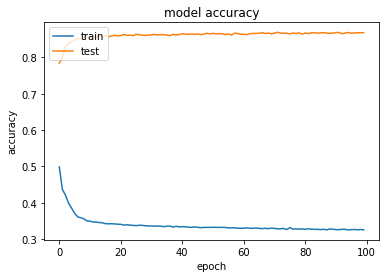

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()